# Ziffernerkennung mittels Tensorflow

Wir starten damit, eine bekannte Bibliothek im Bereich des maschinellen Lernens zu laden: Tensorflow.

In [1]:
import tensorflow as tf

Als nächstes laden wir uns den MNIST-Datensatz herunter.
Er besteht aus handschriftlichen Ziffern von 0 bis 9 und enthält 60.000 grauwertige Trainingsbilder der Größe 28x28, und zusätzlich 10.000 Testbilder.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Schauen wir uns einmal die Daten an:

In [3]:
print('Typ von x_train: {}'.format(type(x_train)))
print('Shape von x_train: {}'.format(x_train.shape))
x_train[0]

Typ von x_train: <class 'numpy.ndarray'>
Shape von x_train: (60000, 28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Versuchen wir mal, die Daten etwas schöner darzustellen.

Die dargestellte Ziffer ist eine 0


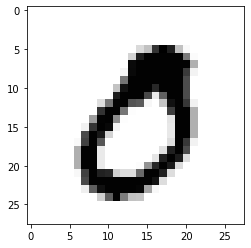

In [4]:
import matplotlib.pyplot as plt
i = 75
plt.imshow(x_train[i], cmap='Greys')
print('Die dargestellte Ziffer ist eine {}'.format(y_train[i]))

---
## Zielstellung

Unser Ziel ist es einen Algorithmus zu entwickeln der ein Bild der Größe 28 x 28 Pixel als Eingabe bekommt und diesem eine Ziffer von 0 bis 9 zuweist.

**Datenbereich**: $\{ 0, 1, \ldots, 255 \}^{28 \times 28}$

**Wertebereich**: $\{0, 1, \ldots , 9\}$

Mathematisch gesprochen suchen wir eine Funktion, die die Abbildung

$$ 
f : \text{Bild} \mapsto \text{Ziffer}
$$

realisiert, also

$$
f : \{0, 1, \ldots, 255\}^{28 x 28} \to \{0, 1, \ldots , 9\}.
$$

## Festlegung eines Models für die Funktion $f$

Neuronale Netze versuchen in vielen Fällen nichts anderes, als komplexe Zusammenhänge zu approximieren.
Der bekannteste Vertreter eines neuronalen Netzes ist das *Feedforward Neural Net*, kurz **FNN**.
Es besteht aus mehreren Schichten, auch *layers* genannt, die über eine Verkettung bzw. Hintereinanderausführung miteinander verbunden sind.

### Schematische Darstellung eines *Feedforward Neural Nets*
![Einfaches Feedforward Neural Net](./pictures/FNN.png)

Dabei ist jede Schicht mit jeweils ihrer nächsten Schicht vollständig verbunden. Jede Abbildung zwischen zwei Schichten\Layers besteht dabei aus zwei Schritten:
1. *Propagation*: Um die Werte der *Neuronen* in der ersten Schicht zu berechnen rechnet man

$$
	(W^{(1)})^\top x^{(0)} + b^{(1)}
	= 
	\begin{bmatrix}
		w_{1,1}^{(1)}
		&
		w_{2,1}^{(1)}
		&
		w_{3,1}^{(1)}
		\\
		w_{1,2}^{(1)}
		&
		w_{2,2}^{(1)}
		&
		w_{3,2}^{(1)}
		\\
		w_{1,3}^{(1)}
		&
		w_{2,3}^{(1)}
		&
		w_{3,3}^{(1)}
		\\
		w_{1,4}^{(1)}
		&
		w_{2,4}^{(1)}
		&
		w_{3,4}^{(1)}
		\\
	\end{bmatrix}
	\begin{pmatrix}
		x^{(0)}_1
		\\
		x^{(0)}_2
		\\
		x^{(0)}_3
	\end{pmatrix}
	+
	\begin{pmatrix}
		b^{(1)}_1
		\\
		b^{(1)}_2
		\\
		b^{(1)}_3
		\\
		b^{(1)}_4
	\end{pmatrix}
    =: 
	\begin{pmatrix}
		z^{(1)}_1
		\\
		z^{(1)}_2
		\\
		z^{(1)}_3
		\\
		z^{(1)}_4
	\end{pmatrix}  
$$

2. *Activation*: Anschließend wenden wir eine nichtlineare Aktivierungsfunktion $\sigma^{(1)}$ auf jedes $z^{(1)}_j$ an und erhalten so $x^{(1)}_j$, d.h.

$$
	\begin{pmatrix}
		x^{(1)}_1
		\\
		x^{(1)}_2
		\\
		x^{(1)}_3
		\\
		x^{(1)}_4
	\end{pmatrix}
    = 
    	\begin{pmatrix}
		\sigma^{(1)}(z^{(1)}_1)
		\\
		\sigma^{(1)}(z^{(1)}_2)
		\\
		\sigma^{(1)}(z^{(1)}_3)
		\\
		\sigma^{(1)}(z^{(1)}_4)
	\end{pmatrix}  
$$

Dabei sind die $w^{(1)}_{i,j}$ sowie die $b^{(1)}_j$ unbekannte Parameter, die während des Trainings bestimmt werden müssen.

## Definition eines Models

Zuerst laden wir einige Funktionen...

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

... und initialisieren unser Modell.

In [6]:
model = Sequential()

Als erstes ziehen wir der Einfachheit halber die Bilder, die eigentlich zweidimensional sind, in die Länge.
Obwohl wir hierbei wichtige Nachbarschaftsinformationen zwischen Pixeln wegwerfen reicht es immer noch aus, um ein anständigen Klassifizierer zu trainieren.

**Hinweis**: Wie das ganze mit richtigen Farbbildern geht, lernt Ihr im Kurs *Optimierung im Maschinellen Lernen*.

**Beispiel**:
$$
\text{Flatten} 
\begin{pmatrix} 1 & 2 \\
3 & 4
\end{pmatrix}
=
\begin{pmatrix} 1 \\ 2 \\ 3 \\ 4 \end{pmatrix}
$$

In [7]:
model.add(Flatten(input_shape=(28, 28)))

Die Dimension unseres Inputlayers ist also $28 \times 28 = 784$.

Als nächstes fügen wir ein *hidden layer* mit 128 Neuronen ein.
Dem Beispiel von oben folgend ergibt das
$784 \times 128 + 128 = 100.480$ 
Unbekannte.

*Hinweis*: Das können wir auch mit der Funktion `model.count_params()` herausfinden. 

In [8]:
model.add(Dense(128, activation='relu'))

Unser `output layer` ist 10-dimensional, da wir uns hier für die übliche 0-1-Kodierung entscheiden, die häufig in der Klassifizierung verwendet wird.

Dabei wird eine Ziffer von 0 bis 9 durch einen Vektor der Länge 10 darstellt, welcher genau an einer Stelle eine Eins und sonst Nullen enthält, also

$$
"0" = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{pmatrix},
\quad
"1" = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{pmatrix},
\quad
"2" = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{pmatrix},
\quad \cdots \quad
"9" = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}.
$$

In [9]:
model.add(Dense(10))

Jetzt kommen also nochmal
$128 \times 10 + 10 = 1290$
unbekannte Parameter dazu.

In [10]:
print('Zusammen ergibt das {} unbekannte Parameter.'.format(model.count_params()))

Zusammen ergibt das 101770 unbekannte Parameter.


Jetzt haben wir ein einfaches Modell definiert.

# Training des Modells

Bevor wir mit dem Training starten können, benötigen wir noch eine *Loss function*.
Eine solche Funktion ist in der Regel ein Maß dafür, wie nah unsere aktuelle Modellvorhersage am tatsächlichen Wert liegt.
Damit sagt sie unserem Algorithmus, ob er gut oder schlecht klassifiziert hat.

Ohne näher darauf einzugehen, verwenden wir die folgende *Loss function*.

In [11]:
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

Jetzt fügen wir alles zusammen ...

In [12]:
model.compile(optimizer='adam',
              loss=loss_func,
              metrics=['accuracy'])

... und trainieren unser Modell mit den Trainingsdaten.

In [13]:
model.fit(x_train, y_train, batch_size = 128, epochs = 3);

Epoch 1/3
469/469 [==============================] - 3s 7ms/step - loss: 4.2507 - accuracy: 0.8709
Epoch 2/3
469/469 [==============================] - 3s 6ms/step - loss: 0.7381 - accuracy: 0.9187
Epoch 3/3
469/469 [==============================] - 2s 4ms/step - loss: 0.3773 - accuracy: 0.9338


Wie man an dem Wert `accuracy` ablesen kann, klassifiziert unser Modell in mehr als 90 % der Fälle die Ziffer korrekt.

Schauen wir mal, wie sich das Modell bei Daten schlägt, mit denen es nicht trainiert wurde:

In [14]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.4912 - accuracy: 0.9161


[0.49118906259536743, 0.916100025177002]

Auch hier erreichen wir eine korrekte Klassifizierung in über 90 % der Fälle.

Am Ende dieses Teils wollen wir uns noch kurz ein paar Beispiele für Ziffern anschauen, die falsch klassifiziert wurden.
Wir können diese mit den folgenden Code-Zeilen rausfinden:

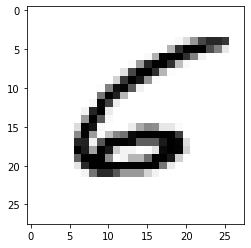

Das Modell sagt 5 voraus.
In Wahrheit ist es eine 6.


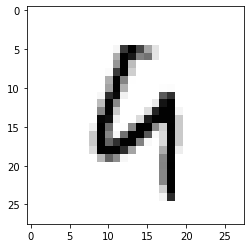

Das Modell sagt 4 voraus.
In Wahrheit ist es eine 9.


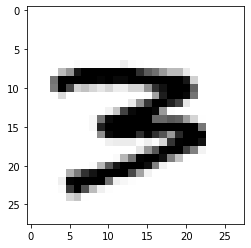

Das Modell sagt 8 voraus.
In Wahrheit ist es eine 3.


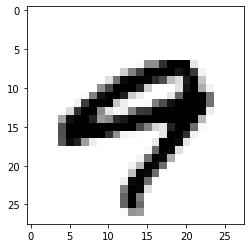

Das Modell sagt 4 voraus.
In Wahrheit ist es eine 9.


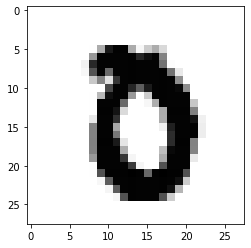

Das Modell sagt 8 voraus.
In Wahrheit ist es eine 0.


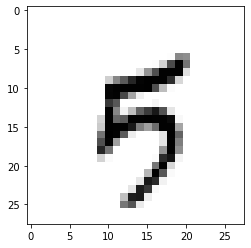

Das Modell sagt 9 voraus.
In Wahrheit ist es eine 5.


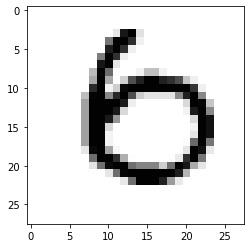

Das Modell sagt 0 voraus.
In Wahrheit ist es eine 6.


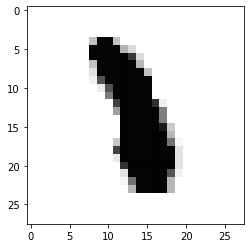

Das Modell sagt 8 voraus.
In Wahrheit ist es eine 1.


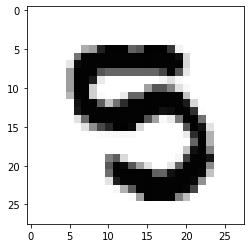

Das Modell sagt 8 voraus.
In Wahrheit ist es eine 5.


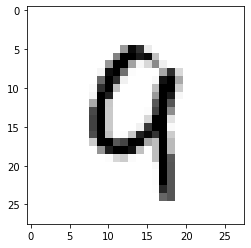

Das Modell sagt 4 voraus.
In Wahrheit ist es eine 9.


In [22]:
import numpy as np

wrong_index = np.where(np.argmax(model.predict(x_test), axis=1) != y_test)[0]

for j in np.random.randint(0,len(wrong_index),10):
    i = wrong_index[j]
    y_i = y_test[i]
    y_model = np.argmax(model.predict(x_test[i:i+1]))
    plt.imshow(x_test[i], cmap = 'Greys')
    plt.pause(0.01)
    print('Das Modell sagt {} voraus.'.format(y_model))
    print('In Wahrheit ist es eine {}.'.format(y_i))


In [21]:
np.random.randint(0,len(wrong_index),10)

array([765, 220, 349, 700, 749, 347, 575, 507, 620, 797])